[TODO Insert Logo Here]

# Workshop 1: Working with Medical Excel Data with Python

Welcome to the first workshop of the course! In this workshop we will be exploring how to work with medical Excel data using Python, to make the process of gaining insights into these data easier. Medical data is often collected in Excel spreadsheets for audit/QI, and code can make the process of analysing this data more streamlined and repeatable.

## Learning Outcomes 
By the end of this session, you should be able to:
- [TODO Update]

*NB - A large learning point for this course is learning how to read documentation. Lots of documentation will be linked in this workshop: try to read it an extract the parts that are relevant to what you are trying to accomplish. Reading documentation is a valuable skill that will allow you to build more complex code using exsiting software.*

###  A note on using Jupyter Notebooks and Google Colab...

These notebooks are split into cells which should be run individually. A number will appear next to each cell (`[1],[2]`, etc.) which indicates what order it was executed in. When a notebook starts in Google Colab, it is allocated cloud resources when it is being used, and deletes them when you stop interacting with the notebook. This means that the notebook will time out and remove your progress if you stop working on it, and you will have to execute the cells again to get to the same point in the workshop. [This webpage](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) has lots of good information about the features of Colabatory notebooks and how to use them.

## Section 1: Installing dependencies and opening Excel files

If you were to do this analysis on your computer, you'd need to make sure that the appropriate packages are installed. For this workshop, we will be using `pandas`, a Python library designed to make working with tabular data (Excel, CSV, etc.) easier. Helpfully, the Google Colab workspace already has this package installed, so we don't have to worry about it in this environment. If you want to work with this data locally, follow [these instructions](https://pandas.pydata.org/docs/getting_started/install.html) to install `pandas` locally or in a Python environment.

We will also import another package, `pyplot`, which will allow us to create some useful graphs of the data for our audit later on in the workshop.

*Run the cell below to import the relevant packages:*

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

When people use `pandas`, they usually abbreviate it to `pd` when they import it. This style makes code clearer, and is also used in `pandas` official documentation. The same goes for importing `pyplot` as `plt`.

To start processing the data, we need to open the data appropriately. The data we will be using for this tutorial will be simulated data which describe a list of imaging investigations that were conducted during a few months in a radiology department. The file is called `imaging_audit.xlsx`, and is included in the `notebooks/data` folder of the course.

We will open the data into a `pandas` DataFrame object, which is equivalent to a sheet in Excel. 

### Exercise: Open the Excel file using `pandas`

Import the `pandas` library, open the file into a variable called `audit_df`, and print the DataFrame. You can use [this documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) to help. Try not to look at the solution below.

### Solution

In [2]:
#@title
audit_df = pd.read_excel("imaging_audit.xlsx", index_col=0)
print(audit_df)

    Patient ID  Age    Admission Date      Imaging Date Imaging Modality
0            0   21  2023-06-15 06:34  2023-06-28 12:47              Mri
1            1   52  2023-01-30 20:16  2023-02-11 15:35               xr
2            2    0  2023-03-17 17:25  2023-03-27 13:49               mr
3            3   69  2023-03-17 09:03  2023-03-24 15:25              MRI
4            4   67  2023-02-25 05:17  2023-03-03 20:56               mr
..         ...  ...               ...               ...              ...
95          95   59  2023-05-27 10:04  2023-06-04 03:30               mr
96          96   55  2023-06-17 23:34  2023-06-29 23:59               ct
97          97   68  2023-08-24 09:12  2023-08-29 08:00               CT
98          98   43  2023-06-13 13:34  2023-06-22 05:01              MRI
99          99   28  2023-06-01 22:57  2023-06-19 22:26               xr

[100 rows x 5 columns]


We can see from this that the DataFrame has a few columns in it:
1. ID for each patient
2. Patient age
3. When they were admitted
4. When they had imaging in the department
5. The modality of the imaging in question

The descriptor `[100 rows x 5 columns]` helpfully tells us that there are 100 patients in the dataset.

## Section 2: Gaining some insight into these data

We can use the `DataFrame.describe()` method to easily describe the data in the table:

In [3]:
audit_df.describe()

,Patient ID,Age
count,100.000000,100.000000
mean,49.500000,39.850000
std,29.011492,24.144922
min,0.000000,0.000000
25%,24.750000,19.250000
50%,49.500000,42.000000
75%,74.250000,61.250000
max,99.000000,84.000000


This tells us more about the numerical data in the table, which is represented by two datatypes:
1. Integers (`int`) - whole numbers (1,2,4, etc.)
2. Floating point numbers (`float`) - any numbers with a decimal point (1.00, 3.14, etc.)

The `describe()` method tells us the mean, median, and other useful bits about a couple of the columns. This information about the `Patient ID` column is fairly useless as the patients are labelled from 0 to 99, but the age data tells us a bit more about the patient population involved in our audit:
1. They have a mean age of around 40 and a standard deviation of 24 years, indicating a diverse range of ages.
2. They have a median age of 42.

We've got some good initial insight into the patients in the table using 3 lines of code! However, mean and median values only tell us so much about the column - seeing a distribution of ages in a graph would tell us much more.

### Exercise: Plotting a histogram

Using the pyplot library, plot a histogram of the first column. Make sure you label the axes and give the plot a title. Hints:
- The DataFrame columns can be accessed like a Python dictionary
- Use the `plt.title()`, `plt.xlabel()` and `plt.ylabel()` functions

### Solution

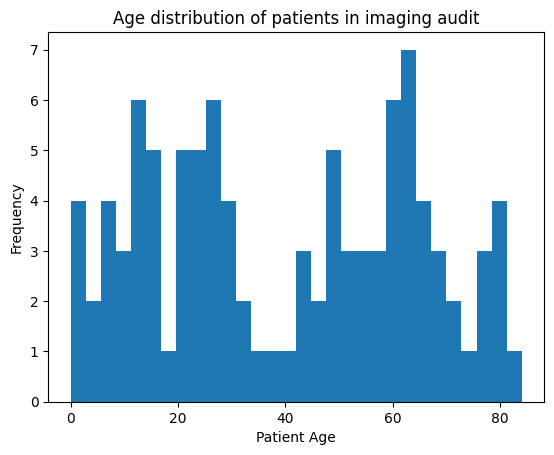

In [25]:
# @title
age_data = audit_df["Age"]
plt.hist(age_data, bins=30)
plt.title("Age distribution of patients in imaging audit")
plt.xlabel("Patient Age")
plt.ylabel("Frequency")
plt.show()

This shows that the data is not normally distributed, and has two vague peaks - one at around age 25 and one at around age 60. 

*Before reading on, take a moment to stop and think about the potential clinical reasons for this.*

One potential scenario is that this is an acute radiology department which does imaging for acute admissions. Most imaging is done for minor injuries in young people (e.g. X-rays for fractures) and for trauma imaging in older people (e.g. CT for potential head injuries, plain films for neck of femur fractures). 

The`plt.hist(data, bins=num_bins)` method is good for generating quick visualisations to get a good overview of the dataset. 

**Bonus task:** You can use the `DataFrame["<column_name>"].plot()` method to generate quick visualisations of the data as well - test this to see how these plots compare to those above!

## Section 3: Working with dates

So far, we've only looked at two columns of data - the patient ID and age. To look further into our data, we need to look at the dates for admission and imaging that are in the DataFrame. However, by default, the dates in the table are stored as strings:

In [9]:
sample = audit_df["Admission Date"][0]
print(type(sample))

<class 'str'>


In order to meaningfully work with dates with `pandas`, we should convert the date columns to `pandas` dates using `pd.to_datetime()`:

In [10]:
audit_df["Admission Date"] = pd.to_datetime(audit_df["Admission Date"])
audit_df["Imaging Date"] = pd.to_datetime(audit_df["Imaging Date"])

Running exactly the same code again, we can see that the datatype is now different:

In [11]:
sample = audit_df["Admission Date"][0]
print(type(sample))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


This will allow us to plot the dates and will allow us to treat them like numbers.

**Tip:** This can be done when importing the file using `pd.read_excel("filename.xlsx", parse_dates=True)`

### Exercise: Helper functions

Using the same approach as the previous example, create a simple function called `column_plotter` that takes a column of the table and plots it as a histogram. Make sure you include arguments for labelling the plot. Call the function to create histograms of the both patient admission and imaging dates.

### Solution

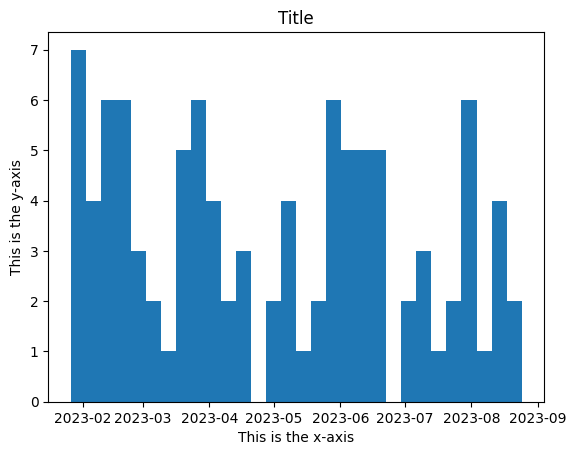

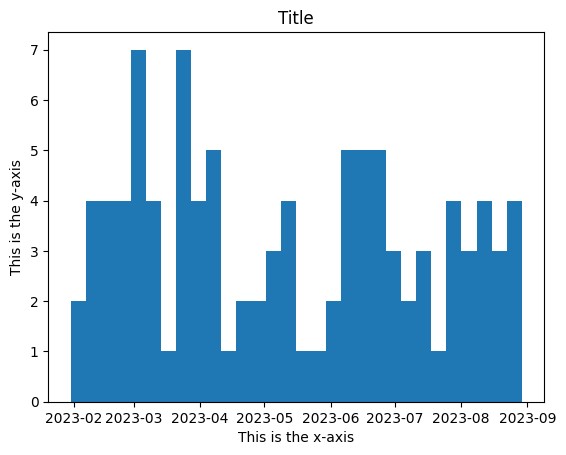

In [24]:
# @title
def column_plotter(column, title="Title", xlabel="This is the x-axis", ylabel="This is the y-axis"):
    plt.hist(column, bins=30)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
column_plotter(audit_df["Admission Date"])
column_plotter(audit_df["Imaging Date"])

We can add titles and labels into the function if we want to add more detail about each plot:

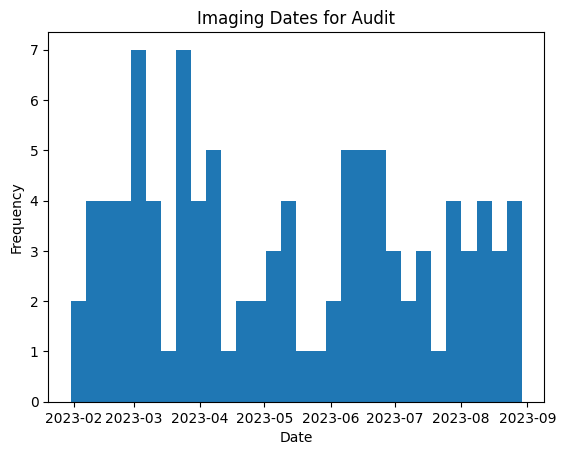

In [35]:
column_plotter(
    audit_df["Imaging Date"],
    title="Imaging Dates for Audit",
    xlabel="Date",
    ylabel="Frequency"
)

These plots don't show any clear trend as to when the imaging was likely to be performed. However, one measure that would be interesting for this audit is the delay to imaging after admission.

### Exercise: Delays to imaging

Using the function we just made, plot the distribution of the imaging delays in days with a histogram. **Hint:** this [StackOverflow question](https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer) may help.

### Solution

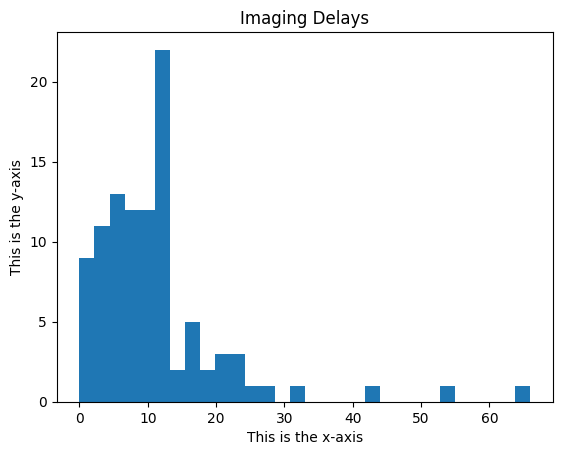

In [36]:
#@title

img_delays = (audit_df["Imaging Date"] - audit_df["Admission Date"]).dt.days
column_plotter(img_delays, title='Imaging Delays')